# "Classifiez automatiquement des biens de consommation"
_NLP Cleaning Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on Colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Mounted at /gdrive
/gdrive
You're on Google Colab


Installations and importations required in the virtual environment.

In [3]:
# import os
# if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
#     os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')

In [4]:
import os
if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
        os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')
else:
    if not (os.path.exists(os.getcwd()+'/requirements_nlp.txt') \
                     and os.path.exists(os.getcwd()+'/P6_functions.py')):
        print("ERROR: Make sure 'P6_functions.py' and \
'requirements_nlp.txt' are in the current working directory")

!pip install -r requirements_nlp.txt

     |████████████████████████████████| 276kB 4.7MB/s 
     |████████████████████████████████| 143kB 10.2MB/s 
     |████████████████████████████████| 1.1MB 13.1MB/s 
  Created wheel for gTTS-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4096 sha256=98873350d5752c9627a31cb10c027251b6fc00efaa1e8f4f21238dff7cd92b55
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=861392 sha256=cbb373a9f3b033ec9ca1a7100cb5c1af47b98490ddae1dc424c72866a6155c43
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
  Created wheel for mwparserfromhell: filename=mwparserfromhell-0.5.4-cp36-cp36m-linux_x86_64.whl size=183777 sha256=31855829b556e87b1f0b3ffa01cf9f214db1b86e094d964aa3a8eda58dd406d7
  Stored in directory: /root/.cache/pip/wheels/2a/76/d5/7088b941df3b362c45dd7912dd05314bc034751ec9cbca9a75


In [5]:
from P6_functions import *

Installations (creating the requirements file)

In [6]:
# !pip install gtts
# !pip install wikipedia2vec==0.2.2

In [7]:
# !pip freeze > requirements_cleaning_eda.txt

Importation of modules and packages. 

In [8]:
import io

import string

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

# import warnings
# warnings.filterwarnings('ignore')

Setting pandas display options.

In [9]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

To play audio text-to-speech during execution.

In [10]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [11]:
speak('Packages and modules successfully imported')

### 0.1 Importing the datasets

Data is composed of 9 distinct .csv files we'll load in a dictionnary of dataframes.

In [12]:
if is_colab==True:
    # Importing database from my Drive
    print("Try to import data files in the notebook from myDrive...")
else:
    # Importing database from PC
    print("Try to import data files in the notebook from PC ('DATA')...")

df = pd.read_csv("../DATA/flipkart_com-ecommerce_sample_1050.csv",
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8')

print("-----> Importation of .csv in the notebook: OK")

Try to import data files in the notebook from myDrive...
-----> Importation of .csv in the notebook: OK


In [13]:
speak('Datasets successfully imported')

### 0.2 First Overview

In [14]:
df.describe(include='all')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1049.00,1049.00,1050,1050,1050,1050,1050,712,1049
unique,149,1050,1050,642,1050,nan,nan,1050,2,1050,27,27,490,984
top,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rrsskids-swing-king-cotton-hammock/p/itmefhyxrbyhtesp?pid=HKSEFHYXHEBSYZR6,Maxima 20981LMGI Attivo Analog Watch - For Men,"[""Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars""]",SHIEBZB4U7BKYJTU,nan,nan,4a1b23dacd7d2a9ec7414f7159f25a48.jpg,False,Cotonex Beige Cotton Kitchen Linen Set (Pack of 2) Price: Rs. 299 Reviews of Cotonex 100% Pure C...,No rating available,No rating available,Lapguard,"{""product_specification""=>[{""key""=>""Type"", ""value""=>""Mug""}, {""key""=>""Mug Capacity"", ""value""=>""5...."
freq,150,1,1,56,1,nan,nan,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,2186.20,1584.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7639.23,7475.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,35.00,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,555.00,340.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,999.00,600.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1999.00,1199.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Printing total nb and percentage of null:

In [15]:
display(print_null_pct(df))

nb of null:  341 
pct of null:  2.3


None

In [16]:
df.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Browsing the content

In [17]:
df[df.isna().any(1)].sample(1)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
2d4f1232af970bd19881ceacad6ccfe3,2015-12-01 06:13:00 +0000,http://www.flipkart.com/playboy-london-new-york-combo-set/p/itme4bqxe3nrh7c2?pid=CAGE4BQXSBKGWBE3,Playboy London And New York Combo Set,"[""Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Playboy Combos""]",CAGE4BQXSBKGWBE3,398.00,388.00,2d4f1232af970bd19881ceacad6ccfe3.jpg,False,Flipkart.com: Buy Playboy London And New York Combo Set online only for Rs. 350 from Flipkart.co...,4,4,NaN,"{""product_specification""=>[{""key""=>""Gift Set Content"", ""value""=>""NA""}, {""key""=>""Number of Conten..."


In [18]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [19]:
df['description']

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...
7b72c92c2f6c40268628ec5f14c6d590    Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...
64d5d4a258243731dc7bbb1eef49ad74    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...
d4684dcdc759dd9cdf41504698d737d8    Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
6325b6870c54cd47be6ebfbffa620ec7    Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...
                                                                                   ...                                                 
958f54f4c46b53c8a0a9b8167d9140bc    Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs...
fd6cbcc22efb6b761bd564c28928483c    Wall

## 1 Data extraction

### 1.1 Categories

Unfolding categories using the 'product_category_tree' colum

In [20]:
# sample checking
df['product_category_tree'][743]

'["Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Water bottle >> Nutcase Water bottle"]'

In [21]:
# determining the maximum tree depth of categories
ser_depth = df['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

In [22]:
# Converting the strings in 'product_category_tree' column in 6 categ columns

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = df['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=df.index)

In [23]:
# printing number of categories in each level and a sample
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5
uniq_id,,,,,,
dc777afc918f513a7253187e00a11948,Home Furnishing,Home Furnishing/Bath Linen,Home Furnishing/Bath Linen/Towels,Home Furnishing/Bath Linen/Towels/,Home Furnishing/Bath Linen/Towels//,Home Furnishing/Bath Linen/Towels///
a11773bc4188f1c6226b941ec61c2024,Beauty and Personal Care,Beauty and Personal Care/Men's Grooming,Beauty and Personal Care/Men's Grooming/Sivanna Men's Grooming,Beauty and Personal Care/Men's Grooming/Sivanna Men's Grooming/Sivanna Baking Powder Rouge High...,Beauty and Personal Care/Men's Grooming/Sivanna Men's Grooming/Sivanna Baking Powder Rouge High...,Beauty and Personal Care/Men's Grooming/Sivanna Men's Grooming/Sivanna Baking Powder Rouge High...
c8c7385b1b9589f009aa836f0590e646,Watches,Watches/Wrist Watches,Watches/Wrist Watches/Times Wrist Watches,Watches/Wrist Watches/Times Wrist Watches/,Watches/Wrist Watches/Times Wrist Watches//,Watches/Wrist Watches/Times Wrist Watches///


Let's see how much items are in each category

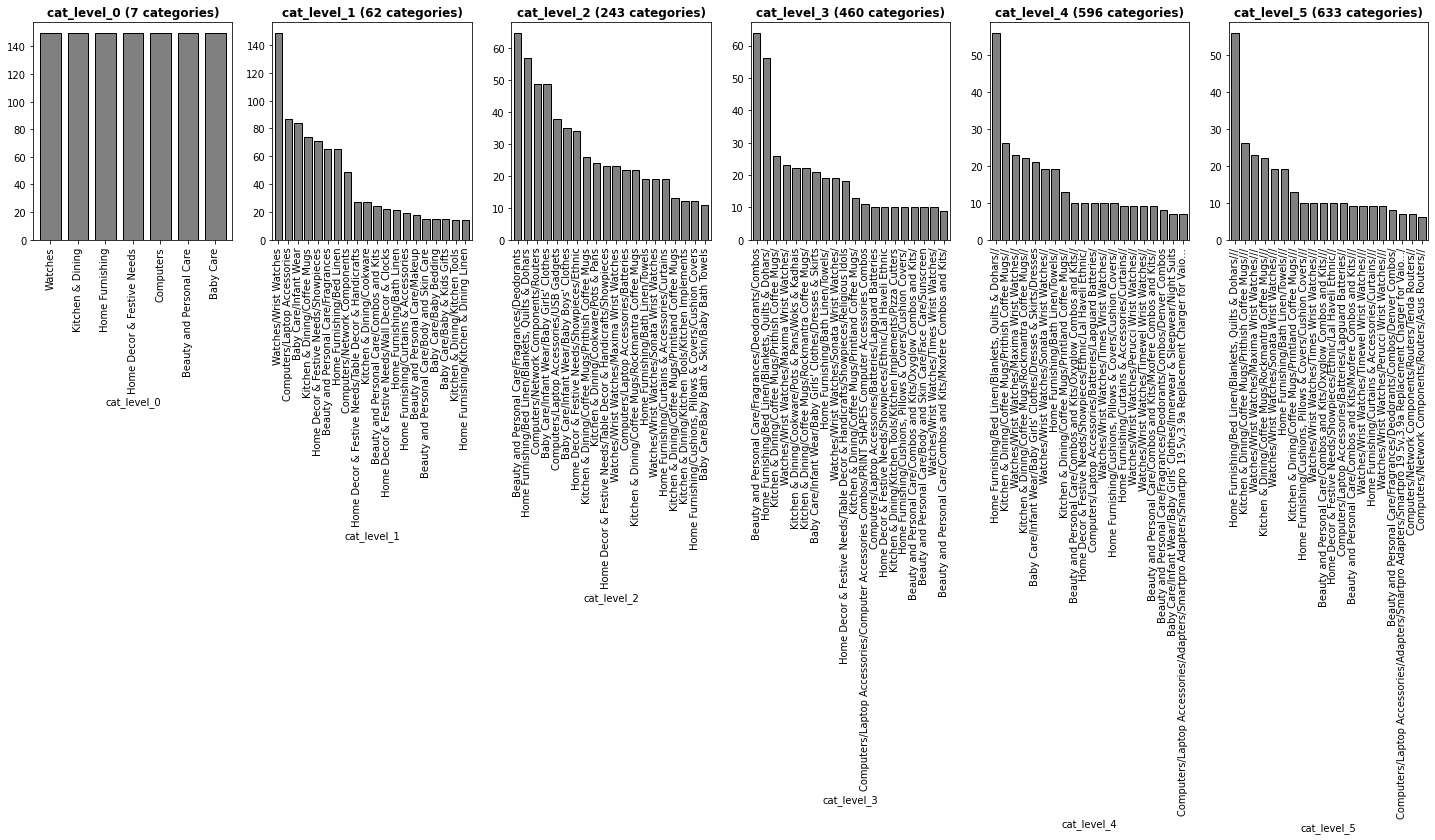

In [24]:
fig = plt.figure(figsize=(25,4))
for i, col in enumerate(df_cat_level.columns,1):
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:20].plot.bar(width=0.75, color='grey', ec='k', ax=ax)
    ax.set_title(col+f' ({ser.shape[0]} categories)', fontweight='bold')

The only level that has a balanced set of items is level 0, with 7 categories.
Let's rename these 7 categories:

In [25]:
df_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [26]:
df_cat_level['category'] = \
    df_cat_level['cat_level_0'].replace({'Home Furnishing': 'Furnishing',
                                        'Baby Care': 'Baby', 
                                        'Watches': 'Watches',
                                        'Home Decor & Festive Needs': 'Decor',
                                        'Kitchen & Dining': 'Kitchen',
                                        'Beauty and Personal Care': 'Beauty',
                                        'Computers': 'Computers'})

### 1.2 Products descriptions

In [27]:
# extracting only useful data
df_desc_cat = pd.concat([df_cat_level['category'],
                         df[["product_name", "description"]]], axis=1)

In [28]:
df_desc_cat.head()

,category,product_name,description
uniq_id,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan..."
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur..."
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ..."
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C..."


In [29]:
# creation of a corpus of all the descriptions
corpus = ' '.join(df_desc_cat['description'].values)
print("total nb of words in the whole corpus: ", len(corpus.split()))

total nb of words in the whole corpus:  80013


## 2 Whole corpus exploration

In [30]:
import nltk

In [31]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Frequency of words (with stopwords)

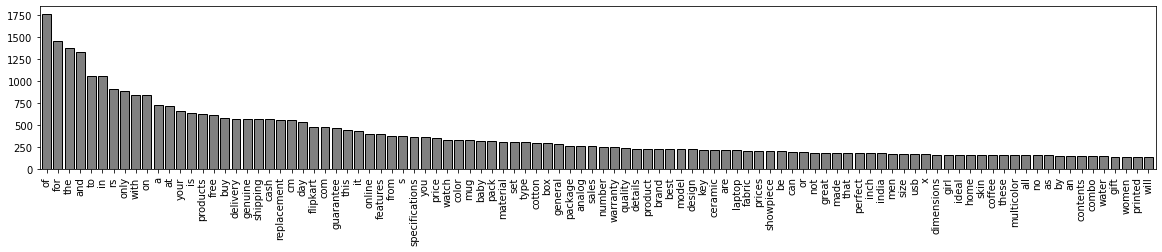

In [32]:
# tokenizing the words in the whole corpus
tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
li_words = tokenizer.tokenize(corpus.lower())
# counting frequency of each word
ser_freq = pd.Series(nltk.FreqDist(li_words))
# plotting the most frequent words
ser_freq.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

In [33]:
english_sw = nltk.corpus.stopwords.words('english')
most_freq_sw = (ser_freq.sort_values(ascending=False)[0:36].index).tolist()
most_freq_sw = [s for s in most_freq_sw if s not in english_sw]
single_let_sw = list(string.ascii_lowercase)
single_let_sw = [s for s in single_let_sw if (s not in most_freq_sw) and\
                                             (s not in english_sw)]

#### Frequency of words without stopwords

In [34]:
# creating a list of stopwords...
sw = set()
# ...including the 36 most frequent words ...
most_freq = (ser_freq.sort_values(ascending=False)[0:36].index).tolist()
sw.update(most_freq)
print("Most frequent words added to stopwords: ", most_freq)
# ...including the single letters ...
single_letters = list(string.ascii_lowercase)
sw.update(single_letters)
# ... as well a known english stopwords from nltk package
sw.update(tuple(nltk.corpus.stopwords.words('english')))
print("Total number of stopwords in sw list: ", len(sw))

Most frequent words added to stopwords:  ['of', 'for', 'the', 'and', 'to', 'in', 'rs', 'only', 'with', 'on', 'a', 'at', 'your', 'is', 'products', 'free', 'buy', 'delivery', 'genuine', 'shipping', 'cash', 'replacement', 'cm', 'day', 'flipkart', 'com', 'guarantee', 'this', 'it', 'online', 'features', 'from', 's', 'specifications', 'you', 'price']
Total number of stopwords in sw list:  215


In [35]:
ser_freq_wo_sw = ser_freq.loc[[s for s in ser_freq.index if s not in sw]]

o---Total number of words: 46445
o---Words in decreasing order of frequency:
watch         330
color         328
mug           327
baby          320
pack          317
             ... 
showcasing      1
rural           1
fascinates      1
purposes        1
nightmares      1
Length: 5057, dtype: int64


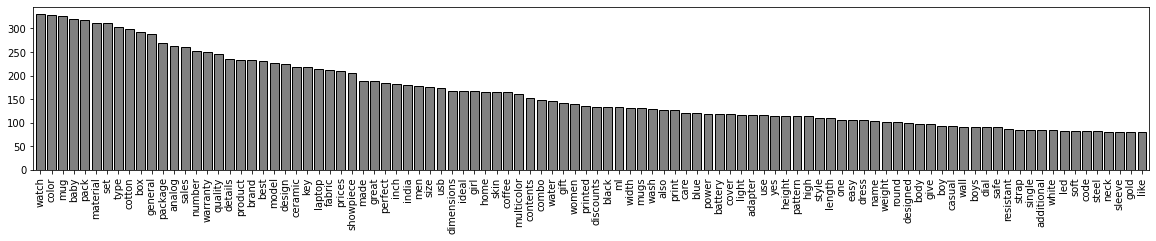

In [36]:
# plotting the most frequent words
print("o---Total number of words: {}\no---Words in decreasing order of\
 frequency:\n{}".format(ser_freq_wo_sw.sum(),
                        ser_freq_wo_sw.sort_values(ascending=False)))
ser_freq_wo_sw.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

#### Frequency of stems

In [37]:
## Lemmatization
# WordNetLemmatizer

In [38]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
ser_freq_stems = pd.Series(ser_freq_wo_sw.values,
                           index=[stemmer.stem(s) for s in ser_freq_wo_sw.index])\
                   .to_frame().reset_index().groupby('index').sum()
ser_freq_stems = pd.Series(ser_freq_stems.iloc[:,0].values,
                           index = ser_freq_stems.index)

o---Total number of words: 46445
o---Words in decreasing order of frequency:
index
mug        457
design     401
color      380
watch      360
pack       342
          ... 
horizon      1
hop          1
smog         1
cvpc         1
sunflow      1
Length: 4062, dtype: int64


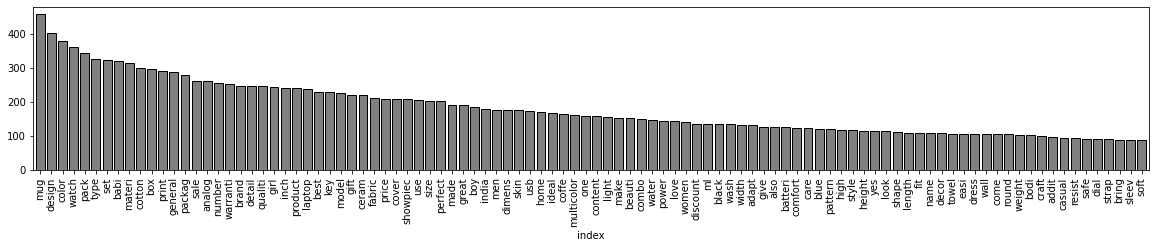

In [39]:
# plotting the most frequent stems
print("o---Total number of words: {}\no---Words in decreasing order of\
 frequency:\n{}".format(ser_freq_stems.sum(),
                        ser_freq_stems.sort_values(ascending=False)))
ser_freq_stems.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

## 3 Text pre-processing


### 3.1 Tokenization - stopwords cleaning - stemming

- regex selection of alphabetical data
- removing stopwords
- removing 36 most frequent words
- stemming

In [40]:
''' from a sentence, containing words (document):
- tokenizes the words if only composed of alphanumerical data,
- removes stopwords if list is given (stopwords)
- stems the words if stemmer given
NB: This pre-processing function can be used to prepare data for Word2Vec
'''
from nltk.stem.snowball import EnglishStemmer

def tokenize_clean(document, stopwords=None, stemmer=None):
    # tokenizing the words in each description
    tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
    li_words = tokenizer.tokenize(document.lower())
    if stopwords is None: stopwords=[]
    # stemming and removing stopwords
    if stemmer is not None:
        li_words = [stemmer.stem(s) for s in li_words if s not in stopwords]
    else:
        # removing stopwords only
        li_words = [s for s in li_words if s not in stopwords]
    return li_words

In [41]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
df_desc_cat['desc_token'] = \
    df_desc_cat['description'].apply(lambda x: tokenize_clean(x,
                                                              stopwords=sw,
                                                              stemmer=stemmer))

In [42]:
df_desc_cat['desc_token_joined'] = \
    df_desc_cat['desc_token'].apply(lambda x: ' '.join(x))

In [43]:
print(df_desc_cat.shape[0], "different descriptions")
df_desc_cat.head()

1050 different descriptions


,category,product_name,description,desc_token,desc_token_joined
uniq_id,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...","[key, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtain, eleg, polyest...",key eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor ...
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...","[sathiya, cotton, bath, towel, bath, towel, red, yellow, blue, bath, towel, machin, washabl, yes...",sathiya cotton bath towel bath towel red yellow blue bath towel machin washabl yes materi cotton...
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...","[key, eurospa, cotton, terri, face, towel, set, size, small, height, inch, gsm, eurospa, cotton,...",key eurospa cotton terri face towel set size small height inch gsm eurospa cotton terri face tow...
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...,"[key, santosh, royal, fashion, cotton, print, king, size, doubl, bedsheet, royal, bedsheet, perf...",key santosh royal fashion cotton print king size doubl bedsheet royal bedsheet perfact wed gift ...
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...","[key, jaipur, print, cotton, floral, king, size, doubl, bedsheet, cotton, jaipur, print, cotton,...",key jaipur print cotton floral king size doubl bedsheet cotton jaipur print cotton floral king s...


In [44]:
big_list = list(df_desc_cat['desc_token'].values)
all_terms = [s for sublist in big_list for s in sublist]
print("Total number of words in all the descriptions (with duplicates) :",
      len(all_terms))
print("Total number of words in all the descriptions (unique) :",
      len(set(all_terms)))

Total number of words in all the descriptions (with duplicates) : 46445
Total number of words in all the descriptions (unique) : 4062


### 3.2 Document-Term Matrices (BOW and TF-IDF)

#### Bag of words using CountVectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words = sw,
                    #   min_df = 3,
                    #   max_df = 70,
                      max_features = 1600,
                      )

CV_TD_mat = vec.fit_transform(df_desc_cat['description'])
print( "Created %d X %d document-term matrix" % (CV_TD_mat.shape[0],
                                                 CV_TD_mat.shape[1]) )

# Vocabulary of the document_term matrix
CV_voc = vec.get_feature_names()
print("Vocabulary has %d distinct terms" % len(CV_voc))

CV_TD_df = pd.DataFrame(CV_TD_mat.todense(),
             index=df_desc_cat.index, # each item
             columns=CV_voc) # each word

Created 1050 X 1600 document-term matrix
Vocabulary has 1600 distinct terms


In [46]:
# New Stopwords list generated because of CountVectorizer parameters
CV_sw = vec.stop_words_
print("Old stop-words list has %d entries" % len(sw) )
print("New stop-words list has %d entries" % len(CV_sw))

Old stop-words list has 215 entries
New stop-words list has 4322 entries


Let's look at a representation of the categories on a projection of the data

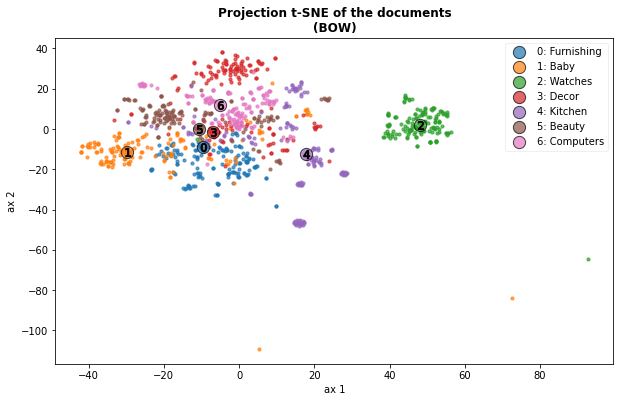

In [47]:
# BOW projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(CV_TD_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(BOW)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

#### TF_IDF matrix using TfidfVectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words=sw,
                            #   min_df = 3,
                            #   max_df = 70,
                            max_features = 1600
                            )
TFIDF_TD_mat = tfidf_vec.fit_transform(df_desc_cat['description'])
print( "Created %d X %d TF-IDF-normalized document-term matrix"\
      % (TFIDF_TD_mat.shape[0], TFIDF_TD_mat.shape[1]) )

# Vocabulary of the document_term matrix
TFIDF_voc = tfidf_vec.get_feature_names()
print("Vocabulary has %d distinct terms" % len(TFIDF_voc))

TFIDF_TD_df = pd.DataFrame(TFIDF_TD_mat.todense(),
                           index=df_desc_cat.index, # each item
                           columns=TFIDF_voc) # each word

Created 1050 X 1600 TF-IDF-normalized document-term matrix
Vocabulary has 1600 distinct terms


In [49]:
# New Stopwords list genearated because of CountVectorizer parameters
TFIDF_sw = tfidf_vec.stop_words_
print("Old stop-words list has %d entries" % len(sw) )
print("New stop-words list has %d entries" % len(TFIDF_sw))

Old stop-words list has 215 entries
New stop-words list has 4322 entries


Let's look at a representation of the categories on a projection of the data

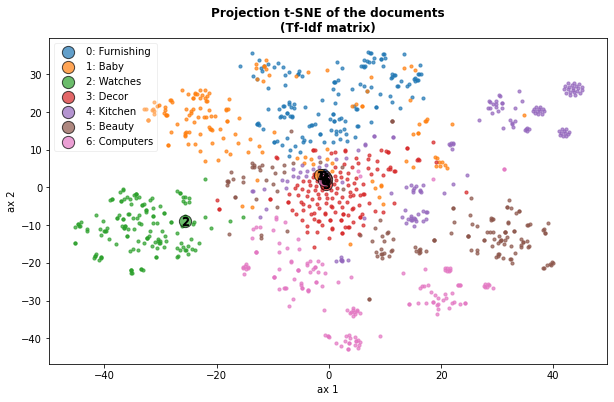

In [50]:
# TF-IDF projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(TFIDF_TD_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(Tf-Idf matrix)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

### 3.3 Word embeddings

#### Wiki2Vec embedding

Let's use a word embedding to get a smarter and smaller representation of our data.
We'll use a pre-trained Word2Vec model (our data are too small to train a model).

In [51]:
from wikipedia2vec import Wikipedia2Vec

In [52]:
## Option 2: using a pretrained model
# https://wikipedia2vec.github.io/wikipedia2vec/pretrained/


In [53]:
wiki2vec = Wikipedia2Vec.load("../DATA/enwiki_20180420_100d.pkl") # 100 dimensions

In [54]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

# from nltk.stem.snowball import EnglishStemmer
# stemmer = EnglishStemmer()

tf_idf_df, actu_sw = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 1,
                                    #    'max_df': 15,
                                       'stop_words': sw},
                         tfidf_on=True)

In [55]:
# Projection of the document_term matrix on the w2v matrix 

wiki2vec_emb_df = proj_term_doc_on_w2v(tf_idf_df, wiki2vec, print_opt=False)

Let's look at a representation of the categories on a projection of the data

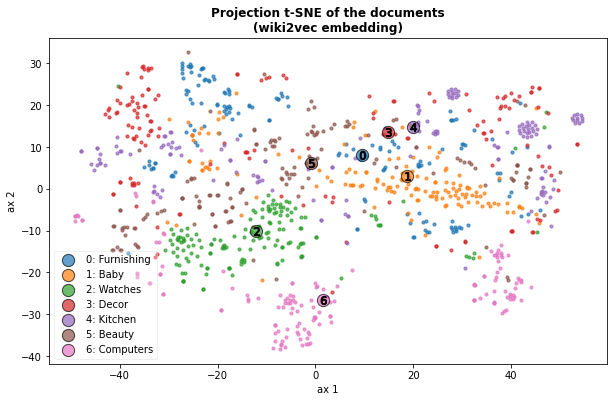

In [56]:
# tfidf_Wiki2Vec_emb projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(wiki2vec_emb_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(wiki2vec embedding)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

#### Training a Word2Vec model on the corpus (gensim)

In [57]:
## Option 1: training a Word2Vec model on the whole corpus

from gensim.models.word2vec import Word2Vec

cust_w2v = Word2Vec(df_desc_cat['desc_token'], # works on lists of tokenized stemmed words
                 size=300,
                 window=20,
                 min_count=2,
                 workers=1,
                 iter=100,
                 sg=1)  #0: CBOW, 1:skip-gram)
cust_w2v_vocab = cust_w2v.wv.vocab
print( "Model has %d terms" % len(cust_w2v_vocab))

# pickle the model
cust_w2v.save('P6_trained_w2v.bin')

# # reload
# w2v_model = gensim.models.Word2Vec.load("w2v-model.bin")

Model has 2978 terms


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [58]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

# from nltk.stem.snowball import EnglishStemmer
# stemmer = EnglishStemmer()

tf_idf_df, actu_sw = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 1,
                                    #    'max_df': 15,
                                       'stop_words': sw},
                         tfidf_on=True)

In [59]:
# examples
cust_w2v.wv['polyest'].shape, cust_w2v.wv['polyest'][:10]

((300,),
 array([-0.21729666,  0.12753767,  0.44450647,  0.088639  , -0.00259717,
         0.21574205,  0.13009596, -0.08039971,  0.246137  ,  0.5440752 ],
       dtype=float32))

In [60]:
tf_idf_df.shape, cust_w2v.wv.vectors.shape

((1050, 5057), (2978, 300))

In [61]:
cust_w2v.

SyntaxError: ignored

In [ ]:
# Projection of the document_term matrix on the w2v matrix 

# custom_w2v_emb_df = proj_term_doc_on_w2v(tf_idf_df, cust_w2v, print_opt=True)

# projection of the Document_terms matrix on the wiki2vec (manually, as the vocabulary is the same)
w2v_emb_df = tf_idf_df.dot(word_vectors_df)

Let's look at a representation of the categories on a projection of the data

In [ ]:
# tfidf_Wiki2Vec_emb projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(custom_w2v_emb_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(wiki2vec embedding)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

## 4 Visualization of the vectorizations with respect to the known categories

In [ ]:
'''
'params' are the arguments of the 'compute_doc_terms_df' function and
take the form (default settings):
    preproc_func=None,
    preproc_func_params=None,
    vec_params = {'min_df': 1},
    tfidf_on=False,
    print_opt=False
'''

from sklearn.metrics import silhouette_score

def plot_grid_proj_params(ser_desc, ser_clust, params, n_rows=1,
                          w2v=None, title=None, figsize=(20,10)): 

    n_cols = len(params)//n_rows + ((len(params)%n_rows)>0)*1

    fig = plt.figure()
    fig.set_size_inches(figsize)

    df_scores = pd.DataFrame()
    # Loops over the parameter to show the projections
    for i, param in enumerate(params,1):

        ax = fig.add_subplot(n_rows, n_cols, i)
        # Vectorization of the descriptions prior to projection on Wiki2Vec
        doc_term_df, actu_sw = compute_doc_terms_df(ser_desc, **param)

        # Projection of the document_term matrix on the w2v matrix
        if w2v is not None:
            doc_term_df = proj_term_doc_on_w2v(doc_term_df, w2v)

        # Computing scores
        silh = silhouette_score(doc_term_df, ser_clust)
        df_scores.loc[i-1,'silh'] = silh

        # tfidf_Wiki2Vec_emb projection
        plot_projection(doc_term_df, model=None, ser_clust=ser_clust,
                        proj='t-SNE', size=10, legend_on=True,
                        title="param set n°{}|silh.={:.2f}".format(i, silh),
                        fig=fig, ax=ax, random_state=14)
        
    if title:
        plt.suptitle(title, fontsize=16, fontweight='bold')
        plt.tight_layout(rect=(0,0,1,0.92))
    else:
        plt.tight_layout()
    plt.show()
    return df_scores

Document-terms matrices (BOW and TfIdf)

In [ ]:
####### BOW: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': False})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=None, title="Bag of Word")

display(df_scores.T)

In [ ]:
####### TF_IDF: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': True})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=None, title='TF-IDF matrix')

display(df_scores.T)

Document-terms matrices (BOW and TfIdf) with W2V projection

In [ ]:
####### BOW->W2V: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': False})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=wiki2vec,
                                  title='Bag of Words -> Wiki2Vec')

display(df_scores.T)

In [ ]:
####### BOW->W2V: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': True})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=wiki2vec,
                                  title='TF-IDF Matrix-> Wiki2Vec')

display(df_scores.T)

## 5 Topics Modeling

We'll create a dataframe where we'll put the results of the best results of clustering or topics modeling obtained with different techniques.

In [ ]:
df_res_clust = pd.DataFrame()
df_res_clust['categories'] = df_desc_cat['category']

### 5.1 Categories Modeling using NMF

In [ ]:
# create the model
from sklearn.decomposition import NMF
k=7 # number of categories
nmf = NMF(init="nndsvd",
          n_components=k) 

Preprocessing and vectorization of the data

In [ ]:
# Vectorization of the descriptions prior to applying NMF

tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

Let's have a look to the 2 matrices documents/topics ans topics/words

In [ ]:
# DOCUMENTS/TOPICS Matrix
W = pd.DataFrame(nmf.fit_transform(tf_idf_df.values),
                 index=tf_idf_df.index, # documents
                 columns=['cat_'+str(i) for i in range(1,k+1)]) # topics
# TOPICS/WORDS Matrix
H = pd.DataFrame(nmf.components_,
                 index=['cat_'+str(i) for i in range(1,k+1)], # topics
                 columns=tf_idf_df.columns) # words
print(W.shape, H.shape)

#### Categories descriptors

Let's have a look to the top words for each category.

In [ ]:
plot_wordclouds_topwords(H, n_top_words=20, n_rows=2)

In [ ]:
# printing 10 top words for each topic
for i in H.index:
    print(i, '---', H.loc[i].sort_values(ascending=False)[0:10].index.tolist())
    print(i, '---',
          np.round(H.loc[i].sort_values(ascending=False)[0:10].values.tolist(),2))

In [ ]:
# plotting bar plots fo 20 top words for each topic
n_rows = 2
fig= plt.figure(figsize=(15,5))
for i, cat in enumerate(H.index, 1):
    n_tot = H.shape[0]
    n_cols = n_tot//n_rows + (n_tot%n_rows!=0)*1
    ax=fig.add_subplot(n_rows, n_cols, i)
    H.loc[cat].sort_values(ascending=False).iloc[0:20].plot.bar(color='grey',
                                                                width=0.8,
                                                                ec='k', ax=ax)
    ax.set_title(cat, fontweight='bold')
plt.tight_layout()
plt.show()

#### Most relevant items for each category

In [ ]:
# 10 most relevant items for each categories
categories = ['cat_'+str(i) for i in range(1,8)]
for cat in categories:
    ser = W.loc[:,cat].sort_values(ascending=False)[0:10]
    print('-'*20+cat.upper()+'-'*20)
    display(df_desc_cat.loc[ser.index, ['product_name', 'description']])

In [ ]:
# Appending the best results of the NMF topics modeling 
df_res_clust['NMF_tfidf'] = W.idxmax(1)

In [ ]:
df_res_clust.sample(5)

### 5.2 Categories modeling with LDA

In [ ]:
# create the model
from sklearn.decomposition import LatentDirichletAllocation as LDA
k=7 # number of categories

lda = LDA(n_components=k)

Preprocessing and vectorization of the data

In [ ]:
# Vectorization of the descriptions prior to applying LDA
tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

Let's have a look to the 2 matrices documents/topics ans topics/words

In [ ]:
# DOCUMENTS/TOPICS Matrix
W = pd.DataFrame(lda.fit_transform(tf_idf_df.values),
                 index=tf_idf_df.index, # documents
                 columns=['cat_'+str(i) for i in range(1,k+1)]) # topics
# TOPICS/WORDS Matrix
H = pd.DataFrame(lda.components_,
                 index=['cat_'+str(i) for i in range(1,k+1)], # topics
                 columns=tf_idf_df.columns) # words
print(W.shape, H.shape)

#### Categories descriptors

Let's have a look to the top words for each category.

In [ ]:
plot_wordclouds_topwords(H, n_top_words=20, n_rows=2)

In [ ]:
# printing 10 top words for each topic
for i in H.index:
    print(i, '---', H.loc[i].sort_values(ascending=False)[0:10].index.tolist())
    print(i, '---',
          np.round(H.loc[i].sort_values(ascending=False)[0:10].values.tolist(),2))

In [ ]:
# plotting bar plots fo 20 top words for each topic
n_rows = 2
fig= plt.figure(figsize=(15,5))
for i, cat in enumerate(H.index, 1):
    n_tot = H.shape[0]
    n_cols = n_tot//n_rows + (n_tot%n_rows!=0)*1
    ax=fig.add_subplot(n_rows, n_cols, i)
    H.loc[cat].sort_values(ascending=False).iloc[0:20].plot.bar(color='grey',
                                                                width=0.8,
                                                                ec='k', ax=ax)
    ax.set_title(cat, fontweight='bold')
plt.tight_layout()
plt.show()

#### Most relevant items for each category

In [ ]:
# 10 most relevant items for each categories
categories = ['cat_'+str(i) for i in range(1,8)]
for cat in categories:
    ser = W.loc[:,cat].sort_values(ascending=False)[0:10]
    print('-'*20+cat.upper()+'-'*20)
    display(df_desc_cat.loc[ser.index, ['product_name', 'description']])

In [ ]:
# Appending the best results of the LDA topics modeling 
df_res_clust['LDA_tfidf'] = W.idxmax(1)

In [ ]:
df_res_clust.sample(5)

### 5.3 Categories modeling with LSA

In [ ]:
# create the model
from sklearn.decomposition import TruncatedSVD
k=7 # number of categories

lsa = TruncatedSVD(n_components=k)

Preprocessing and vectorization of the data

In [ ]:
# Vectorization of the descriptions prior to applying LDA
tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

Let's have a look to the 2 matrices documents/topics ans topics/words

In [ ]:
# DOCUMENTS/TOPICS Matrix
W = pd.DataFrame(lsa.fit_transform(tf_idf_df.values),
                 index=tf_idf_df.index, # documents
                 columns=['cat_'+str(i) for i in range(1,k+1)]) # topics
# TOPICS/WORDS Matrix
H = pd.DataFrame(lda.components_,
                 index=['cat_'+str(i) for i in range(1,k+1)], # topics
                 columns=tf_idf_df.columns) # words
print(W.shape, H.shape)

(1050, 7) (7, 539)


#### Categories descriptors

Let's have a look to the top words for each category.

In [ ]:
plot_wordclouds_topwords(H, n_top_words=20, n_rows=2)

In [ ]:
# printing 10 top words for each topic
for i in H.index:
    print(i, '---', H.loc[i].sort_values(ascending=False)[0:10].index.tolist())
    print(i, '---',
          np.round(H.loc[i].sort_values(ascending=False)[0:10].values.tolist(),2))

In [ ]:
# plotting bar plots fo 20 top words for each topic
n_rows = 2
fig= plt.figure(figsize=(15,5))
for i, cat in enumerate(H.index, 1):
    n_tot = H.shape[0]
    n_cols = n_tot//n_rows + (n_tot%n_rows!=0)*1
    ax=fig.add_subplot(n_rows, n_cols, i)
    H.loc[cat].sort_values(ascending=False).iloc[0:20].plot.bar(color='grey',
                                                                width=0.8,
                                                                ec='k', ax=ax)
    ax.set_title(cat, fontweight='bold')
plt.tight_layout()
plt.show()

#### Most relevant items for each category

In [ ]:
# 10 most relevant items for each categories
categories = ['cat_'+str(i) for i in range(1,8)]
for cat in categories:
    ser = W.loc[:,cat].sort_values(ascending=False)[0:10]
    print('-'*20+cat.upper()+'-'*20)
    display(df_desc_cat.loc[ser.index, ['product_name', 'description']])

In [ ]:
# Appending the best results of the LDA topics modeling 
df_res_clust['LSA_tfidf'] = W.idxmax(1)

In [ ]:
df_res_clust.sample(5)

,categories,NMF_tfidf,LDA_tfidf
6ed4eb71c0707f1d6fdddcf62562cb02,Kitchen,cat_6,cat_3
8141b9d5af35017a907b1e88c17f7963,Computers,cat_6,cat_2
69446af66066146718cd569f87e99fff,Kitchen,cat_5,cat_6
5c77aa1fc09901ae07c392c152a70e41,Decor,cat_6,cat_6
41fd5af61752be98b19b611a6ff9a0ef,Kitchen,cat_5,cat_6


### 5.4 KMeans Clustering

#### Clustering on BOW and TF-IDF matrices

In [ ]:
# Create the model
from sklearn.cluster import KMeans
k=7 # number of categories
km = KMeans(n_clusters=k) 

Preprocessing and vectorization of the data

In [ ]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

In [ ]:
# Fitting the Kmeans model
km.fit(tf_idf_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Appending the best results of the Kmeans clustering
df_res_clust['KMclust_tfidf'] = km.labels_

In [ ]:
df_res_clust.sample(5)

,categories,NMF_tfidf,LDA_tfidf,KMclust_tfidf
141d2b743c477043041faddf9233c8ad,Baby,cat_4,cat_7,0
25ce025c38c55f28fd0ea3bb0200df79,Baby,cat_4,cat_7,0
53c4f1e5cb1767f1a6ba05d32dfaf107,Computers,cat_1,cat_1,3
2eb07dc77e2fc7e3668fd7ed9b864039,Furnishing,cat_6,cat_4,3
5b378b0925d5409b5d84ceb416fc2afc,Decor,cat_3,cat_5,6


#### Clustering on Word2vec embedding

#### Clustering on NMF selected features

#### Clustering on LDA selected features

### 5.5 Comparison of clusters labels with true categories

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
df_res_clust.columns

Index(['categories', 'NMF_tfidf'], dtype='object')

In [ ]:
adjusted_rand_score(df_res_clust['categories'],
                    df_res_clust['NMF_tfidf'])

0.3814818069719561

In [ ]:
ser_ari_pairs_models = ARI_column_pairs(df_res_clust, first_vs_others=True,
                                        print_opt=True)

--- ARI between first and the 3 others ---


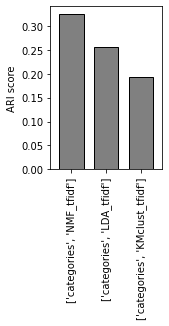

In [ ]:
fig = plt.figure(figsize=(2,3))
ser_ari_pairs_models.plot.bar(width=0.7, color='grey', ec='k')
plt.ylabel('ARI score')
# plt.title('ARI score comparing the cluster\nlabel prediction of pairs of models')
# plt.gca().set(ylim=(0.85,1))
plt.show()

###

- calcul de la pertinence des catégories trouvées par rapport aux catégories initiales et représentation graphique

- optimisation du nombre de catégories par mesure de la cohérence des mots les plus représentatifs de chaque catégorie (nécessite d'entraîner un modèle word2vec)
- représentation des catégories (des mots les plus représentatifs qui les composent) avec t-SNE
- essai direct de clustering sur la représentation des mots par Word2Vec

- Latent Dirichlet Allocation pour trouver d'autres clusters

- comment mettre en place un vote permettant d'aggréger le résultat de plusieurs clusterings différents lorsque les catégories n'ont pas les mêmes numéros ? 

## Exportation

Now we export the dataset of aggregated orders in a .csv file.

In [ ]:
dfs['ord_it'].to_csv('agg_order_items.csv')

NameError: ignored